In [1]:
#importing package
import idbsocialdatapy as idb
import plotnine
import numpy as np
import pandas as pd
from plotnine import *
dictionary = idb.query_dictionary()

In [2]:
tamhHousehold = idb.query_indicator(indicator = 'tamh_ch', # define indicator to consult 
                          #categories = 'sex,age', # define category/ies I want to see in the indicator
                           #define countries you want data from
                          yearstart = '1998', # starting period
                          yearend = '2021') # ending period

In [3]:
tamhHousehold['year'] = pd.to_numeric(tamhHousehold['year'])
tamhHouseholdv2 = tamhHousehold[tamhHousehold['year']>1999]
tamhHouseholdv2['year'] = tamhHouseholdv2['year'].map(str)
tamhHouseholdv2 = tamhHouseholdv2[(tamhHouseholdv2['value']<9)]

C:\Users\DCOR\AppData\Local\Temp\ipykernel_38088\1993306432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\DCOR\Anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 20 x 10 in image.
C:\Users\DCOR\Anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Output/averageHouseholdSize.jpg


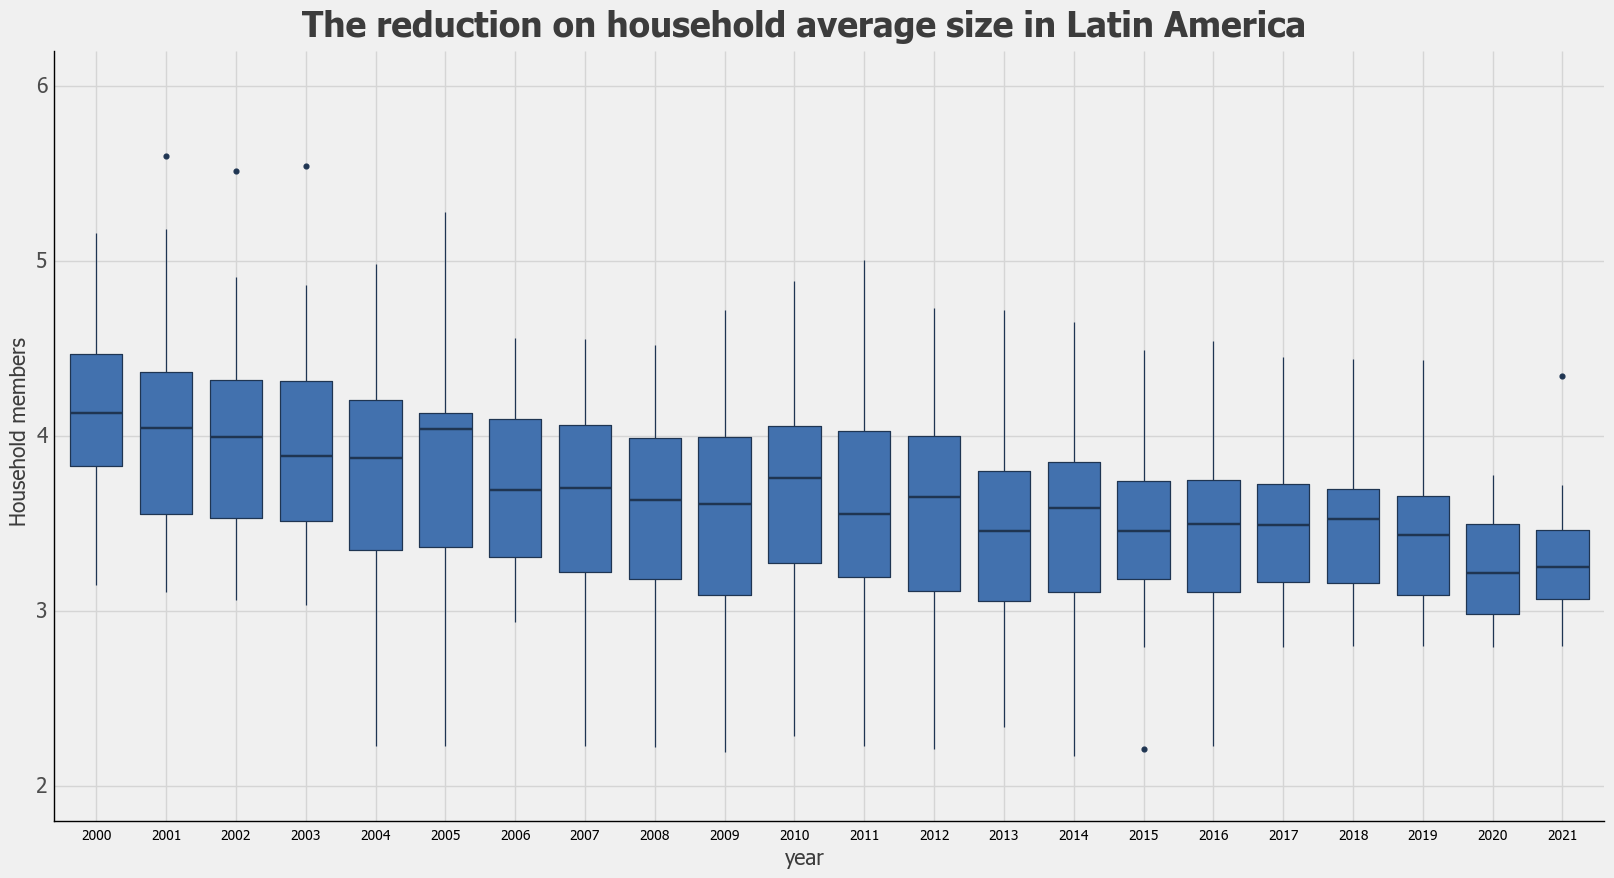

<ggplot: (115044637239)>

In [8]:
tamhHouseholdFig = (
    ggplot(tamhHouseholdv2, aes("year", "value"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE")
    + ylab("Household members")
    + scale_y_continuous(breaks=np.arange(0, 7, 1), 
                         limits=[2, 6])
    + ggtitle("The reduction on household average size in Latin America")
    + theme_538()
    + theme(figure_size=(20, 10),
            axis_line=element_line(size=1, colour="black"),
            panel_border=element_blank(),

            plot_title=element_text(size=25, family="Tahoma", 
                                    face="bold"),
            text=element_text(family="Tahoma", size=15),
            axis_text_x=element_text(colour="black", size=10)
)
)
ggsave(plot = tamhHouseholdFig, filename = "Output/averageHouseholdSize.jpg")
tamhHouseholdFig